# Effect Of Covid Vaccination on the world 

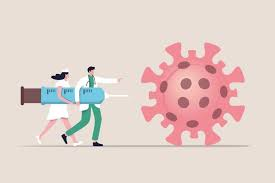

**While the world is under the influence of covid 19 the vaccine is a big ray hope for everyone . This file is about the Vaccine distribution in the world . Hope you like it :)**

# Importing Packages

![](https://media2.giphy.com/media/UwrdbvJz1CNck/giphy.gif?cid=ecf05e47yozvx1unhdgaus9s1iigclsbkrb5atr3zc9ain9w&rid=giphy.gif)

In [ ]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
import datetime
warnings.filterwarnings("ignore")
np.random.seed(32)

# Reading The Data

![](https://media2.giphy.com/media/WoWm8YzFQJg5i/giphy.gif?cid=ecf05e47fdhl1ngusnm4zyubqs1klcp5seajwez0lad85jb8&rid=giphy.gif)

In [ ]:
data=pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')
data2=pd.read_csv('../input/covid-19/data/countries-aggregated.csv')

In [ ]:
data.head()

# Vaccinations over the world over time 

![](https://media4.giphy.com/media/FO8CZ01HoTCA5ahQQq/giphy.gif?cid=ecf05e47s7bm84o02deie6dzeavlr3rl1dgjh6lt56sbana0&rid=giphy.gif)

In [ ]:
data.dropna(subset=['daily_vaccinations'],inplace=True)
s=data['date'].str.split('-',expand=True)
data['Year']=s[0]
data['Month']=s[1]
data['Date']=s[2]
fig1=px.scatter_geo(data,color='vaccines',locationmode="ISO-3",locations="iso_code",opacity=0.6,
                     hover_name="iso_code", size="daily_vaccinations",projection='conic equal area',animation_group ="iso_code",color_continuous_scale='blackbody',
                     animation_frame="Date",scope='world',symbol='vaccines',template="plotly_dark",title='Vaccination Count Over The World Over Time' )
fig1.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 400

fig1.update_geos(
    landcolor="white",
    oceancolor="#006994",
    showocean=True,
    lakecolor="LightBlue"
)

fig1.update_traces(
    marker_coloraxis=None
)
fig1.show()

### We can clearly see that Pfizer/Biotech's impact in USA is huge and it keeps on growing by the date increases . We can also see heavy impact of CNBG/Cinovac starting in China . Sinovac takes a sudden roll in Turkey on 14th and keeps on growing after that :)

# Which vaccine is distributed in the world the most ??

In [ ]:
s=data.drop_duplicates(subset=['iso_code'])['vaccines'].apply(lambda x: x.split(','))
dic={}
for i in s:
    for j in i :
        if j[0]==' ':
            k= j[1:]
        elif j[-1]==' ':
            k=j[:-1]
        else:
            k=j
        if k not in dic :
            dic[k]=1
        else:
            dic[k]+=1
px.bar(x=list(dic.keys()),y=list(dic.values()),color=list(dic.keys()),template='plotly_dark',labels={'x':'Vaccine Name','y':'Total Count'})

From this we cans see that Pfizer is the vaccine most spread in the world in Januray 2021 followed by Moderna and Sinovac :)

In [ ]:
arr=[]
index1=data.groupby(['country','date']).count().index
index2=data2.groupby(['Country','Date']).count().index
for i in index2:
    if i in index1:
        arr.append(1)
    else:
        arr.append(0)
data2['Vaccine_is_there']=arr
data2.head()

In [ ]:
t=data2.groupby(['Country']).sum()
cons=t[t['Vaccine_is_there']==0].index
dan=data2[~data2['Country'].isin(cons)]

# Source Distribution of the data

![](https://media2.giphy.com/media/l2QEilXOdTp3kKdeU/giphy.gif?cid=ecf05e475ahizqq6fkrx597vazuqzizm01u1vg1z8meqd7ft&rid=giphy.gif)

In [ ]:
dt=data['source_name'].value_counts()
px.pie(values=dt.values,names=dt.index,template='plotly_dark')

# Rate in increase of deaths over time

In [ ]:
len(data2['Country'].unique())

In [ ]:
data2['Date']=pd.to_datetime(data2['Date'])
dfs=list(data2.groupby("Country"))
first_title = dfs[0][0]+' '*30 +'1 here represents :2399'
traces = []
buttons = []
for i,d in enumerate(dfs):
    visible=[False]*len(dfs)
    visible[i]=True
    name=d[0]
    scale=MinMaxScaler()
    yp=scale.fit_transform(d[1][['Deaths']])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=d[1]['Date'],y=[i[0] for i in yp]))
    mm=max(d[1]['Deaths'])
    traces.append(
    fig.update_traces(visible=True if i==0 else False).data[0])
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title":str(name)+' '*30+'1 here represents :'+str(mm)}]))

updatemenus = [{'active':0, "buttons":buttons}]
shapes=[({'type': 'line',
               'xref': 'x',
               'yref': 'y',
               'x0': '2020-12-29' ,
               'y0': 0,
               'x1': '2020-12-29',
               'y1': 1})]
fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus,shapes=shapes,template='plotly_dark'))
fig.update_layout(title=first_title, title_x=0.5)
fig.show()

# Total vaccinations vs Vaccination per hundred :P

In [ ]:
datan=data[['country','iso_code','date','total_vaccinations_per_hundred','daily_vaccinations']]
datan.sort_values('date',inplace=True)
datan.dropna(inplace=True)
fig = px.scatter(datan, x="total_vaccinations_per_hundred", y='daily_vaccinations', animation_frame="date", animation_group="iso_code",
           hover_name="iso_code", text='iso_code',range_x=[-10,100], range_y=[-100000,1500000])

fig.update_traces(marker=dict(size=32,  color='DarkSlateGrey'))
fig.update_layout(template='plotly_dark')
fig.show()

This figure shows the increase in the total_vaccinations_per_hundred for different countries :)

 # When will the vaccine per hundred will become hundred ??

![](https://media0.giphy.com/media/YWWeMTgSprEAqzbanh/giphy.gif?cid=ecf05e47na6liahmvi7fd20boi1nx9hjwr0ekfjtb7xyyrzc&rid=giphy.gif)

In [ ]:
# We are gonna use keras model with LSTM here to do some predictions :)
name=input('Please enter the country name for the time series analysis :')
datacd=data[data['country']==name]

In [ ]:
# Using simple LSTM code to do some time series predictions :)

datacd.sort_values('date',inplace=True)
lp='total_vaccinations_per_hundred'
datacd.dropna(subset=[lp],inplace=True)
datac=datacd[[lp]]
dates=datacd['date'].values
train,test=train_test_split(datac,test_size=0.2,shuffle=False)
def create_test_train(dataset,look_back=1):
    x=dataset.values[0:len(dataset)-look_back]
    y=dataset.values[look_back:len(dataset)]
    return x,y
look_back = 2
trainX, trainY = create_test_train(train, look_back)
testX, testY = create_test_train(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Making the model
model = Sequential()
model.add(LSTM(1000, input_shape=(1, 1)))
model.add(Dense(1000))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
fitted_model=model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=2,validation_data=(testX,testY))

In [ ]:
# Plotting the loss of the model
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])

In [ ]:
# make predictions
trainPredict = fitted_model.model.predict(trainX)
testPredict = fitted_model.model.predict(testX)
import plotly.graph_objects as go
from plotly.subplots import make_subplots10

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=datacd['date'][:len(trainPredict)],y=trainX.flatten(), name="Original data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=datacd['date'][:len(trainPredict)],y=trainPredict.flatten(), name="Predicted data"),
    secondary_y=True,
)
fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
# Let's predict for 10 days more :)
n=int(input())
date_n=datacd[len(trainPredict)-1:len(trainPredict)+n+1]['date']
l=[]
t=trainX[-1]
for i in range(n):
    
    pred=fitted_model.model.predict(t.reshape(1,1,1))
    l.append(pred)
    t=pred
l=[i[0][0] for i in l]
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=datacd['date'][:len(trainPredict)],y=trainX.flatten(), name="Original data"),
    secondary_y=False,
)


fig.add_trace(go.Scatter(x=date_n,y=l,name='Forecast'),secondary_y=False)

fig.update_layout(template='plotly_dark')
fig.show()

# we can clearly see the predictions using this model :) 

![](https://i.pinimg.com/originals/86/92/f1/8692f18df55b22ac4cba9935210b41e9.gif)

# Thank you :)



# To be continued ....